# **DL - Group Assignment 1**

Group members:
*   Annika í Jákupsstovu, study no. 20204059
*   Mikkel Ørts Nielsen, study no. 20205211

# **Description of assignment**



In this assignment, you are required to delve into the practical aspects of Deep Learning by constructing and evaluating a neural network using PyTorch. This exercise is designed to deepen your understanding of neural network architectures, hyperparameter tuning, and the preprocessing steps necessary for effective model training and evaluation. You will have the freedom to choose a dataset from either the M1 or M2 module or select an external dataset that intrigues you. By experimenting with different neural network configurations and hyperparameters, you will gain hands-on experience in optimizing ML models to achieve desired performance metrics.

**Task**

Build, train, and evaluate a neural network using Pytorch.
The neural network should have a minimum of 2 hidden layers.
Experiment with at least 5 different variations of hyperparameters (e.g., number of layers/neurons, activation functions, epochs, optimizers, learning rates, etc.).
The assignment should include the following steps:

*  Feature Selection
*  Feature Engineering (if necessary)
*  Standard ML Preprocessing (if necessary)
*  Train-Test Split
*  Defining a Neural Network Architecture in Pytorch
*  Defining a Training Loop
*  Training the Model
*  Experimenting with Different Hyperparameters
*  Evaluating the Final Model on the Test Data

**Data**

Choose a dataset from the M1 or M2 module, or other datasets if you prefer.

**Delivery**

Create a GitHub repository.
Save the Colab notebook in the repository.
Provide a README.md with a brief description of the assignment.
Submissions can be made in groups of up to 3 members.
Submit the assignment by sending an email with the link to the repository to Hamid (hamidb@business.aau.dk).

# **Loading Packages**

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from tqdm import tqdm_notebook
import itertools

# **Loading Data**

We have chosen to work with a dataset about breast cancer found on Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset.

The dataset includes various features representing cell nucleus characteristics. These features are computed and categorized into mean, standard error, and the largest values for:
*  id
*  diagnosis: M = malignant (Cancer), B = benign (No Cancer)

Columns 3 to 32 contain ten real-valued features for each cell nucleus:
*  radius: distance from the center to points on the perimeter
*  texture: standard deviation of gray-scale values
*  perimeter
*  area
*  smoothness: local variation in radius lengths
*  compactness: perimeter^2 / area - 1.0
*  concavity: severity of concave portions of the contour
*  concave points: number of concave portions of the contour
*  symmetry
*  fractal dimension: "coastline approximation" - 1

In [ ]:
# Loading the data from github repository
df = pd.read_csv('https://raw.githubusercontent.com/MikkelONielsen/deeplearning_assignment_1/main/breast-cancer.csv')

In [ ]:
# Looking at the top rows of the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset doesn't have any missing values.

# **Exploratory Data Analysis**

In this section we'll do some EDA to see which features we should include in the neural network.

In [ ]:
# Checking the number of rows and features
df.shape

(569, 32)

## **The Diagnosis variable**

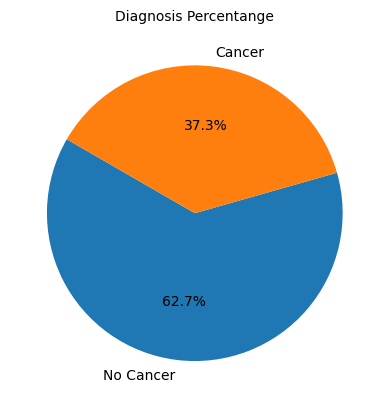

In [ ]:
plt.plot()
class_pie = df['diagnosis'].value_counts()
size = class_pie.values.tolist()
types = class_pie.axes[0].tolist()
labels = 'No Cancer', 'Cancer'
plt.title('Diagnosis Percentange', fontsize=10)
patches = plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=150)

In [ ]:
# Encoding the categorical variable "diagnosis" to contain 1, if the patient has cancer and 0 if the patient doesn't have cancer
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

## **Checking for correlation between variables**

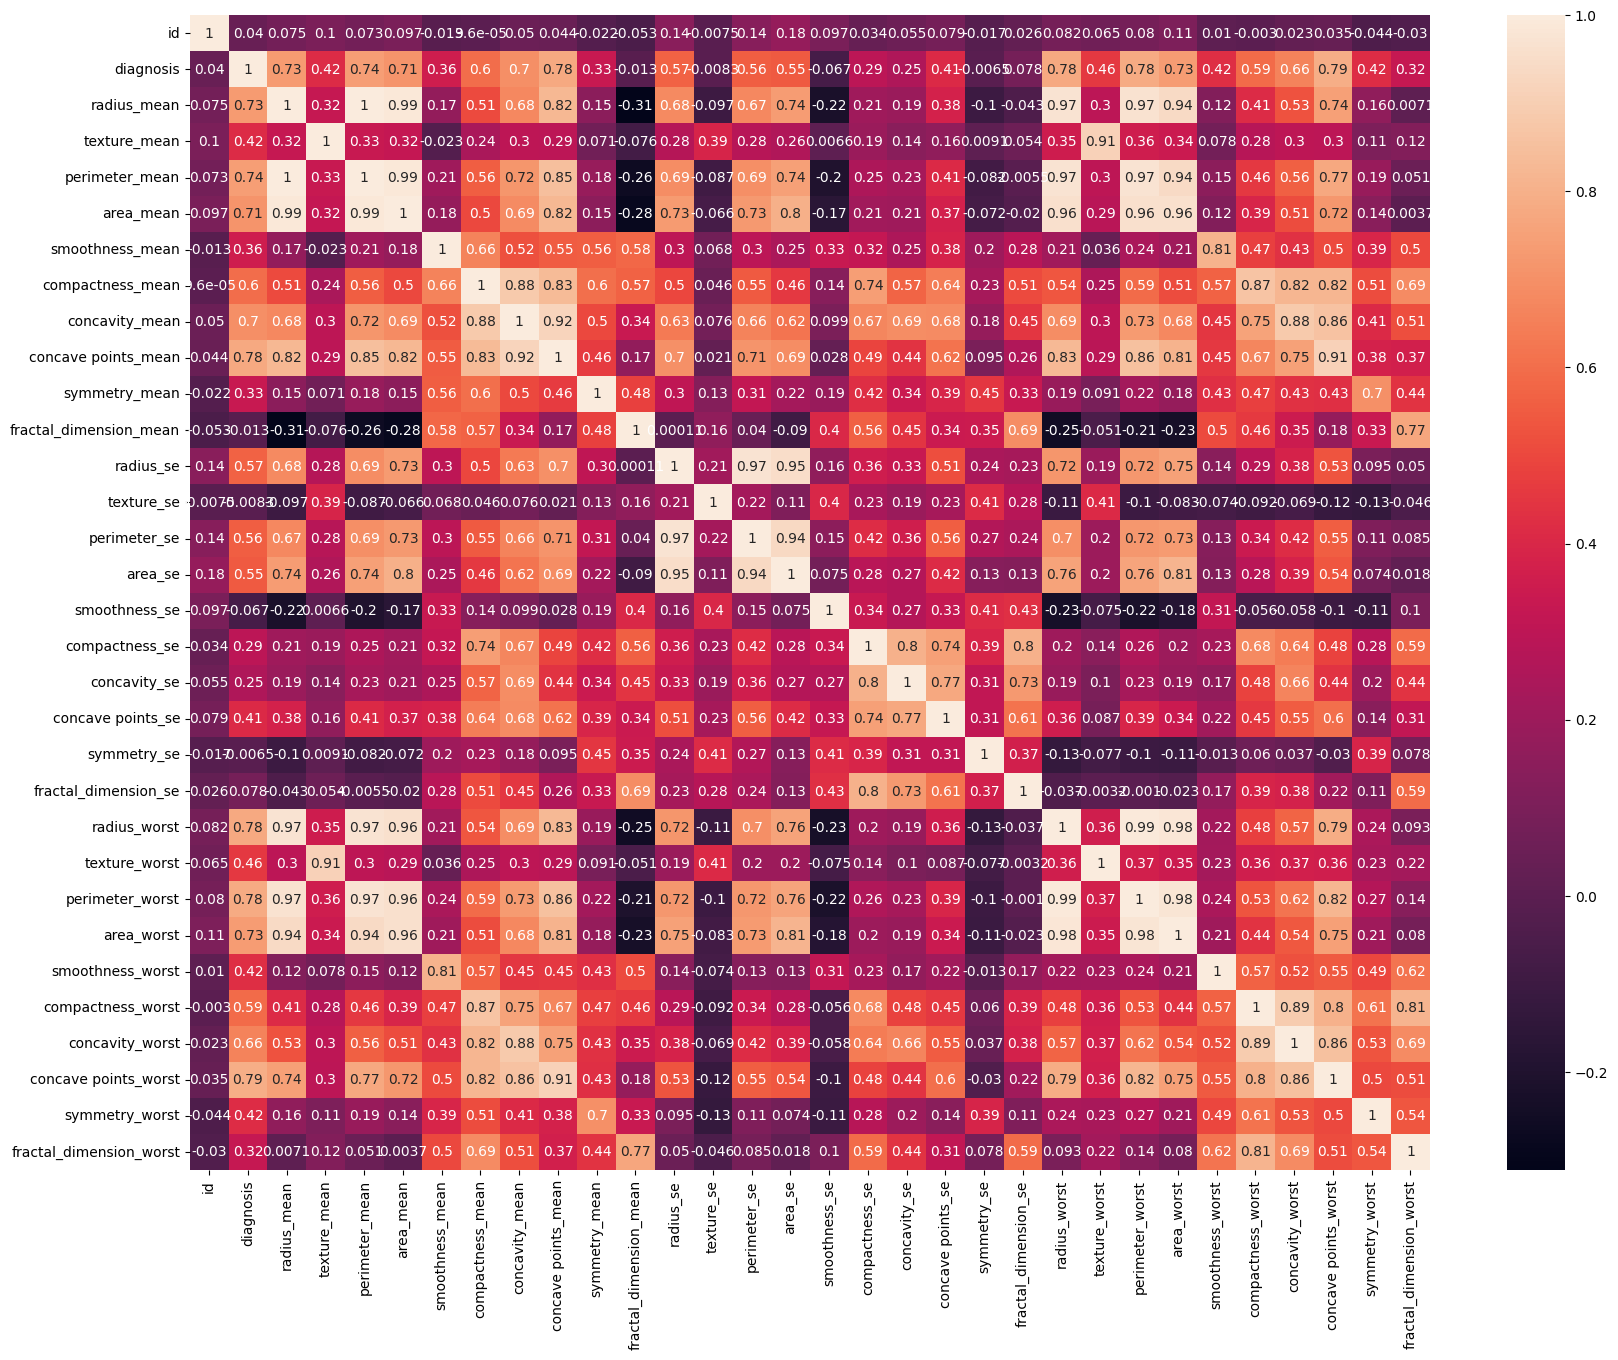

In [ ]:
# Creating a heatmap to check for correlation
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Feature Selection**

For simplicity, we choose to include the features "Diagnosis" and other features ending with "mean", because they have high correlation with the diagnosis.

In [ ]:
# Creating a new dataframe including only the chosen features
df_1 = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

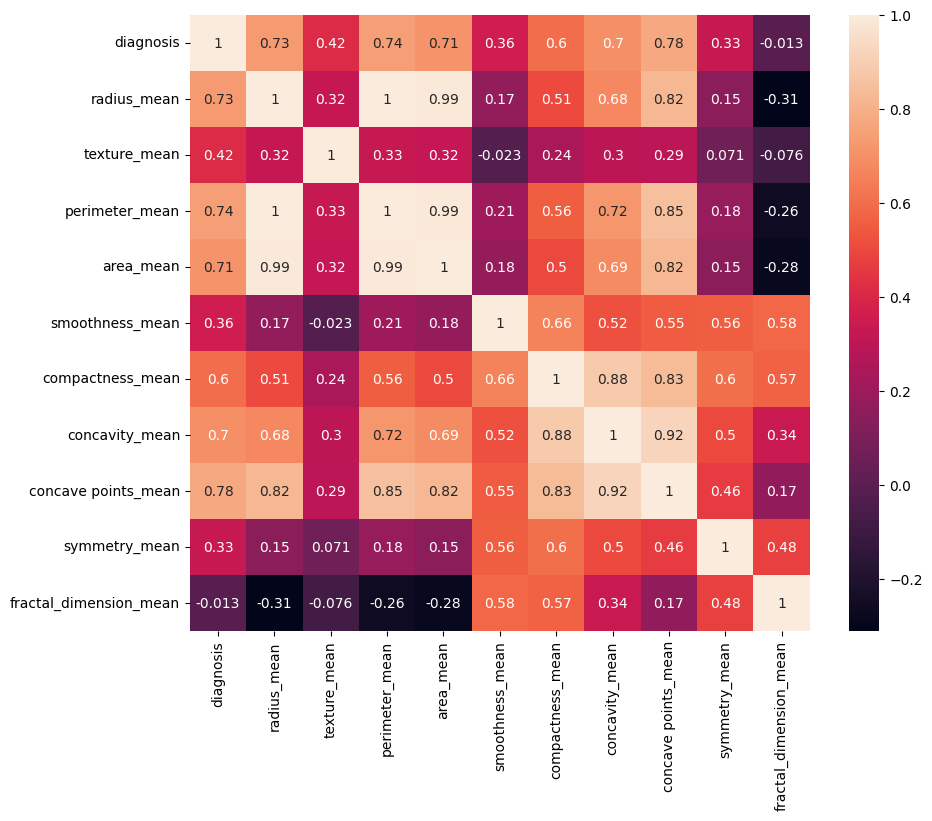

In [ ]:
# Creating a new heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_1.corr(), annot=True)
plt.show()

# **Machine Learning Preprocessing**

We'll start by scaling the numerical features

In [ ]:
# Defining the scaler
scaler = MinMaxScaler()

# Creating a df containing only numerical variables and another df containing categorical variables
numerical_col = df_1[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
categorical_col = df_1[['diagnosis']]

# Scaling the numerical variables
data_scaled = scaler.fit_transform(numerical_col)

# Converting the resulting scaled array into a dataframe
data_s = pd.DataFrame(data_scaled, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

# Checking how the dataframe looks
data_s

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


In [ ]:
# Merging the scaled data with the categorical variables
final_data = pd.concat([categorical_col,data_s], axis=1)
final_data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


# **Determining the ML problem**

Before starting on the network, we need to make some considerations:

1. What kind of data do we have?
*   Tabular -> MLP (ANN)
*   Sequential -> RNN
*   Image -> CNN
*   Graph -> GNN

This dataframe contains tabular data, so we need to use MLP (ANN)

2. What kind of problem do we have?
*   Regression?
*   Classification? If yes, is it a Binary, Multiclass or multilabel classification?

In this case we have a binary classification problem, where our target is the diagnosis.

# **Train-Test Split**

In [ ]:
# Dividing the data into a training and test set
X = final_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].values
y = final_data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Data imbalance**

In [ ]:
# Checking for data imbalance in the diagnosis variable
final_data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# As we have some imbalance, we'll use SMOTE to resample the data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Splitting the resampled data into train and validation sets for model training
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# **Defining a Neural Network Architecture in Pytorch**

In [ ]:
# Checking the shape of X in the resampled training data
X_train_resampled.shape

(457, 10)

In [ ]:
# Convert the data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Checking the shape of X_train tensor
X_train_tensor.shape

torch.Size([457, 10])

In [ ]:
# Checking the shape of X_test tensor
X_test_tensor.shape

torch.Size([114, 10])

# **Defining a Training Loop and Training the model**

We'll start by training the model using 10 epochs and 0.05 as learning rate.

In [ ]:
# Initializing Hyperparameters
epochs_1 = 10
learning_rate_1 = 0.05

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net_1 = torch.nn.Sequential(# Input and hidden layer
                                torch.nn.Linear(10, 20),
                                torch.nn.ReLU(), # for the non-linear part we use ReLU, as this is binary classification

                                # 2nd layer
                                torch.nn.Linear(20, 10),
                                torch.nn.ReLU(),

                                 # the output layer
                                 torch.nn.Linear(10,1),
                                 torch.nn.Sigmoid(), # we use Sigmoid, because this is a binary classification problem

                                 );

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net_1.parameters(), lr=learning_rate_1)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs_1), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net_1.forward(X_train_tensor[i].reshape(1, 10))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-21-f6efc82e186f>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs_1), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.5134
--------------------------------------------------


Epoch 2 Average Loss: 0.2470
--------------------------------------------------


Epoch 3 Average Loss: 0.2313
--------------------------------------------------


Epoch 4 Average Loss: 0.2201
--------------------------------------------------


Epoch 5 Average Loss: 0.2134
--------------------------------------------------


Epoch 6 Average Loss: 0.2095
--------------------------------------------------


Epoch 7 Average Loss: 0.2048
--------------------------------------------------


Epoch 8 Average Loss: 0.2023
--------------------------------------------------


Epoch 9 Average Loss: 0.1998
--------------------------------------------------


Epoch 10 Average Loss: 0.1973
--------------------------------------------------



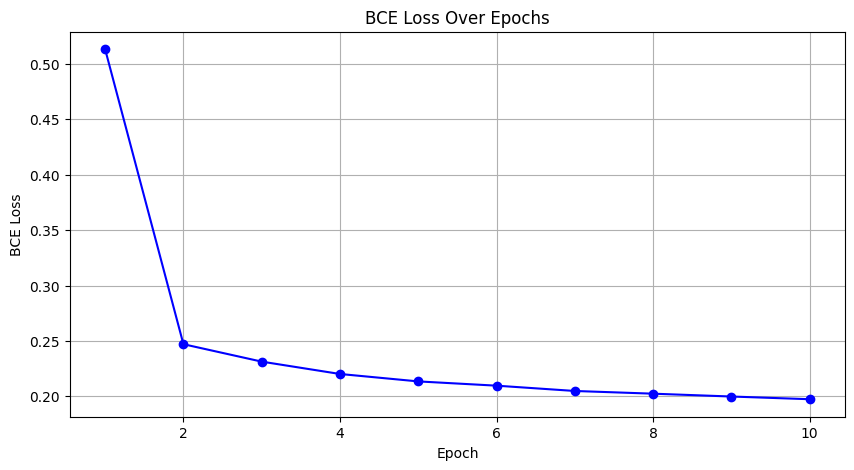

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs_1 + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs_1)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

This shows good results.

# **Experimenting with Different Hyperparameters**

We'll try training the model with a different learning rate, to see how this affects the results.

In [ ]:
# Initializing Hyperparameters
epochs_2 = 10
learning_rate_2 = 2

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net_2 = torch.nn.Sequential(# Input and hidden layer
                                torch.nn.Linear(10, 20),
                                torch.nn.ReLU(), # for the non-linear part we use ReLU, as this is binary classification

                                # 2nd layer
                                torch.nn.Linear(20, 10),
                                torch.nn.ReLU(),

                                 # the output layer
                                 torch.nn.Linear(10,1),
                                 torch.nn.Sigmoid(), # we use Sigmoid, because this is a binary classification problem

                                 );

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net_2.parameters(), lr=learning_rate_2)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs_2), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net_2.forward(X_train_tensor[i].reshape(1, 10))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-23-f13be15be21b>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs_2), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.8724
--------------------------------------------------


Epoch 2 Average Loss: 0.8697
--------------------------------------------------


Epoch 3 Average Loss: 0.8697
--------------------------------------------------


Epoch 4 Average Loss: 0.8697
--------------------------------------------------


Epoch 5 Average Loss: 0.8697
--------------------------------------------------


Epoch 6 Average Loss: 0.8697
--------------------------------------------------


Epoch 7 Average Loss: 0.8697
--------------------------------------------------


Epoch 8 Average Loss: 0.8697
--------------------------------------------------


Epoch 9 Average Loss: 0.8697
--------------------------------------------------


Epoch 10 Average Loss: 0.8697
--------------------------------------------------



Looking at these results we can conclude that changing the learning rate doesn't improve our initial training loop.

Next we'll try using the initial hyperparameters, but adding dropout to the loop to see if this improves the model.

In [ ]:
# Initializing Hyperparameters
epochs_3 = 10
learning_rate_3 = 0.05

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net_3 = torch.nn.Sequential(# Input and hidden layer
                                torch.nn.Linear(10, 20),
                                torch.nn.ReLU(), # for the non-linear part we use ReLU, as this is binary classification
                                torch.nn.Dropout(0.10), # To fix overfitting problems, we'll try adding dropout

                                # 2nd layer
                                torch.nn.Linear(20, 10),
                                torch.nn.ReLU(),
                                torch.nn.Dropout(0.10),

                                 # the output layer
                                 torch.nn.Linear(10,1),
                                 torch.nn.Sigmoid(), # we use Sigmoid, because this is a binary classification problem

                                 );

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_net_3.parameters(), lr=learning_rate_3)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs_3), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net_3.forward(X_train_tensor[i].reshape(1, 10))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-24-4864ace380af>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs_3), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.6508
--------------------------------------------------


Epoch 2 Average Loss: 0.3328
--------------------------------------------------


Epoch 3 Average Loss: 0.2924
--------------------------------------------------


Epoch 4 Average Loss: 0.2673
--------------------------------------------------


Epoch 5 Average Loss: 0.2158
--------------------------------------------------


Epoch 6 Average Loss: 0.2417
--------------------------------------------------


Epoch 7 Average Loss: 0.2225
--------------------------------------------------


Epoch 8 Average Loss: 0.2307
--------------------------------------------------


Epoch 9 Average Loss: 0.2288
--------------------------------------------------


Epoch 10 Average Loss: 0.2343
--------------------------------------------------



These results show that adding the dropout doesn't improve our model either.

# **Evaluating the Final Model on the Test Data**

As none of our experiments improved the initial model, we'll use the first model for the remainder of this notebook.

In [ ]:
# Saving the trained model
torch.save(model_net_1, 'model_net_1.pkl')

In [ ]:
# Loading the model for inference

model_net_1_trained = torch.load('model_net_1.pkl')

# Setting the model to evaluation Mode
model_net_1_trained.eval()

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)

To check for the average loos on the test set, we'll use Hamid's amazing code :)

In [ ]:
# Initializing a variable to store the total loss
total_loss = 0.0

# Initializing a variable to store all the predictions
all_predictions = []

# Looping over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_net_1(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()

Average Loss on Test Set: 0.1626


<ipython-input-27-a61a5f063421>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  all_predictions_tensor = torch.tensor(all_predictions).squeeze()


## **Confusion matrix**

To check how accurate the model predicts the diagnosis, we'll use a confusion matrix.

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[66  5]
 [ 1 42]]


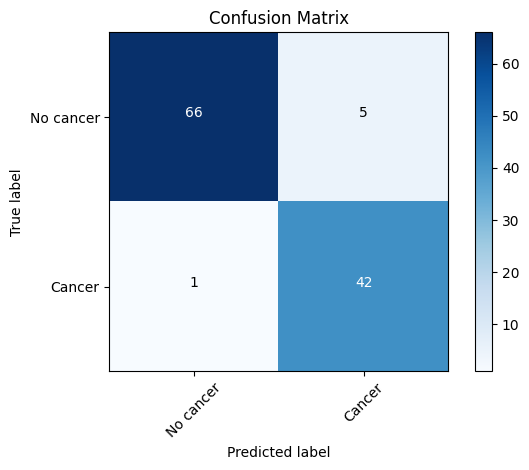

In [ ]:
# Convert predicted probabilities to binary labels
threshold = 0.70
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=['No cancer', 'Cancer'], title='Confusion Matrix')
plt.show()

This confusion matrix shows only one false negative, which isn't good for that one patient, but overall shows a quite accurate model.

In [ ]:
# Calculating the accuracy of the model
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9385964912280702

The model has a very good accuracy.